# Урок 3. TensorFlow - Практическое задание

  __1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston.__ 


In [1]:
# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

from keras.datasets import boston_housing

import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
(train_x,train_y),(test_x,test_y) = boston_housing.load_data()

In [3]:
mean = train_x.mean(axis=0) # Вычисляем среднее по строкам
std = train_x.std(axis=0) # Стандартное отклонение

# Функция для нормализации
def norm(x):
  return (x - mean) / std

In [4]:
# Нормализация.
########################################################################
train_x = norm(train_x)
test_x = norm(test_x)

# Приводим значения ответов в диапазон от 0 до 1
min_y = train_y.min()
max_y = train_y.max() - min_y #"опустим" максимум на min_y
train_y = (train_y - min_y) / max_y #отклонение от минимума к амплитуде
test_y = (test_y - min_y) / max_y

print(train_x.shape) 
print(test_x.shape)  

(404, 13)
(102, 13)


In [5]:
boston_model = Sequential([
    Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
    Dense(64, activation='linear'),
    Dense(1, activation='sigmoid')
])

boston_model.compile(optimizer='rmsprop',
                     loss='mse',
                     metrics=['mae'])

boston_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
boston_history = boston_model.fit(train_x,
                                  train_y,
                                  epochs=15,
                                  batch_size=2000, validation_split=0.2)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.0741 - mae: 0.2091 - val_loss: 0.0355 - val_mae: 0.1376
Epoch 2/15
1/1 [==============================] - 0s 45ms/step - loss: 0.0358 - mae: 0.1447 - val_loss: 0.0291 - val_mae: 0.1195
Epoch 3/15
1/1 [==============================] - 0s 43ms/step - loss: 0.0267 - mae: 0.1208 - val_loss: 0.0256 - val_mae: 0.1118
Epoch 4/15
1/1 [==============================] - 0s 58ms/step - loss: 0.0227 - mae: 0.1096 - val_loss: 0.0231 - val_mae: 0.1063
Epoch 5/15
1/1 [==============================] - 0s 78ms/step - loss: 0.0202 - mae: 0.1019 - val_loss: 0.0211 - val_mae: 0.1018
Epoch 6/15
1/1 [==============================] - 0s 42ms/step - loss: 0.0184 - mae: 0.0961 - val_loss: 0.0194 - val_mae: 0.0980
Epoch 7/15
1/1 [==============================] - 0s 53ms/step - loss: 0.0170 - mae: 0.0914 - val_loss: 0.0181 - val_mae: 0.0946
Epoch 8/15
1/1 [==============================] - 0s 80ms/step - loss: 0.0159 - mae: 0.0877 - val_l

In [7]:
# Наш прогноз
preds = boston_model.predict(test_x).flatten()

# Возвращаем к прежнему размеру
preds = preds * max_y + min_y 
test_y = test_y * max_y + min_y

In [8]:
# Средний модуль отклонения 
err = np.mean(abs(preds - test_y))
print(err)

3.4646122801537618


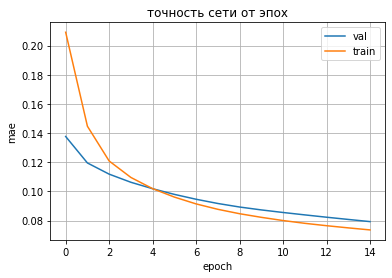

In [9]:
plt.plot(boston_history.history['val_mae'] ,label='val')
plt.plot(boston_history.history['mae'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

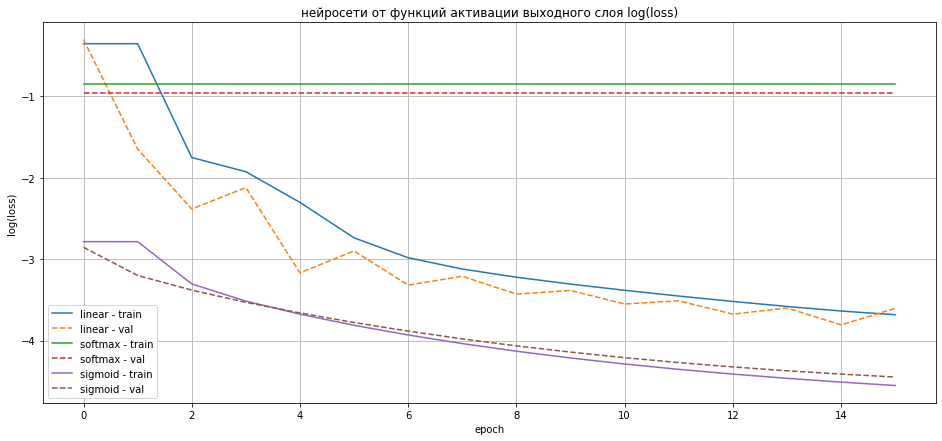

In [10]:
# Изменяем функцию активации выходного слоя
###################################################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_list = []
output_act_list = ['linear', 'softmax', 'sigmoid']
for out_act in output_act_list:
  # создаем модель boston_model_1
  boston_model_1 = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(64, activation='linear'),
      Dense(1, activation=out_act)
  ])
  # сохраняем ее веса (это начальная точка) boston_model_1.save_weights('boston_model_1.h5')
  boston_model_1.save_weights('boston_model_1.h5')
  # создаем рабочую модель boston_model_i куда будем загружать эти весa (она должна быть идентичной структуры)
  boston_model_i = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(64, activation='linear'),
      Dense(1, activation=out_act)
  ])
  # загружаем веса boston_model_i.load_weights('boston_model_1.h5')
  boston_model_i.load_weights('boston_model_1.h5') 
  # компилируем boston_model_i     
  boston_model_i.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])
  # вычисляем ошибку для boston_model_i без обучения
  bh0_tr = boston_model_i.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_val = boston_model_i.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh = boston_model_i.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )  
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики mae
  bh_list.append(bh.history)
  # картинки
  plt.plot(epoch,np.log([bh0_tr[0]]+bh.history['loss']),'-', label = out_act +' - train')
  plt.plot(epoch,np.log([bh0_val[0]]+bh.history['val_loss']),'--', label = out_act + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от функций активации выходного слоя log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()  

__Вывод:__

Лучше всего для данной задачи регрессии в качестве функции активации выходного слоя показала себя функция 'sigmoid'.

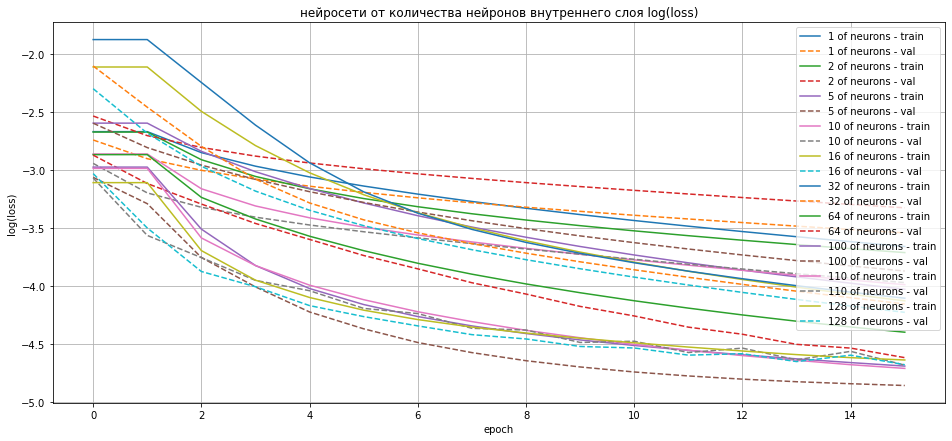

In [11]:
# Изменяем число нейронов в слое
###################################################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_2_list = []
neur_list = [1, 2, 5, 10, 16, 32, 64, 100, 110, 128]
for i_neur in neur_list:
  # создаем модель boston_model_2
  boston_model_2 = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(i_neur, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # сохраняем ее веса (это начальная точка) boston_model_2.save_weights('boston_model_2.h5')
  boston_model_2.save_weights('boston_model_2.h5')
  # создаем рабочую модель boston_model_j куда будем загружать эти весa (она должна быть идентичной структуры)
  boston_model_j = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(i_neur, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # загружаем веса boston_model_j.load_weights('boston_model_2.h5')
  boston_model_j.load_weights('boston_model_2.h5') 
  # компилируем boston_model_j     
  boston_model_j.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])
  # вычисляем ошибку для boston_model_j без обучения
  bh0_j_tr = boston_model_j.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_j_val = boston_model_j.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh_2 = boston_model_j.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )  
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики mae
  bh_2_list.append(bh_2.history)
  # картинки
  plt.plot(epoch,np.log([bh0_j_tr[0]]+bh_2.history['loss']),'-', label = str(i_neur) + ' of neurons' +' - train')
  plt.plot(epoch,np.log([bh0_j_val[0]]+bh_2.history['val_loss']),'--', label = str(i_neur) + ' of neurons' ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества нейронов внутреннего слоя log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

__Вывод:__

Лучше всего для данной задачи регрессии показали себя 110 нейронов внутреннего слоя.

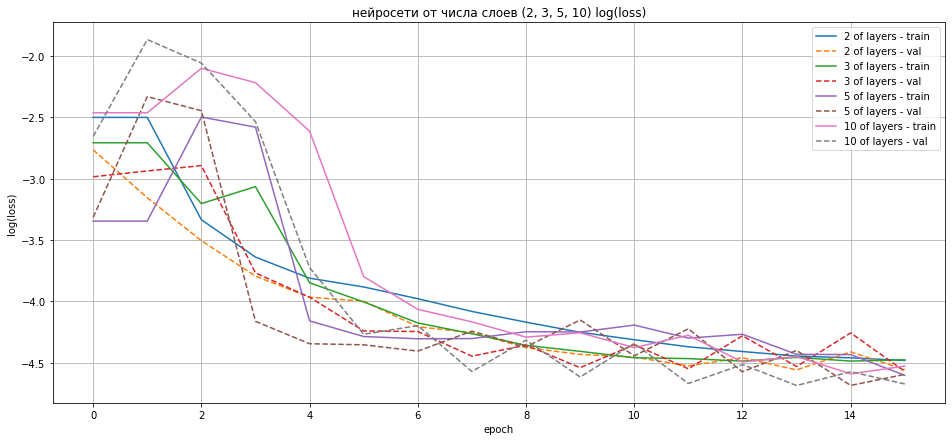

In [12]:
# Разное число слоев (2, 3, 5, 10)
###################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15

# вектор для выводoв результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_3_list = []

# будем изменять число слоев (2, 3, 5, 10)
layer_list = [2, 3, 5, 10]
for i_layer in layer_list:
  # создаем модель model_3
  boston_model_3 = Sequential(name='boston_model_3')
  boston_model_3.add(Dense(64, activation='relu', input_shape=(train_x.shape[1],))) # входной слой + поносвязный слой из 64 нейронов с активацией ReLU 
  for k in range(i_layer): # Скрытый слой k из 10+(10-k)*10 нейронов с активацией linear
    boston_model_3.add(Dense(  10+(10-k)*10, activation='linear')) 
  boston_model_3.add(Dense(1, activation='sigmoid')) # выходной слой из 1 нейронa (для задачи регрессии) + активация sigmoid

  # сохраняем ее веса (это начальная точка) boston_model_3.save_weights('boston_model_3.h5')
  boston_model_3.save_weights('boston_model_3.h5')

  # создаем рабочую модель boston_model_k куда будем загружать эти весa (она должна быть идентичной структуры)
  boston_model_k = Sequential(name='boston_model_k')
  boston_model_k.add(Dense(64, activation='relu', input_shape=(train_x.shape[1],))) # входной слой + поносвязный слой из 64 нейронов с активацией ReLU 
  for k in range(i_layer): # Скрытый слой k из 10+(10-k)*10 нейронов с активацией linear
    boston_model_k.add(Dense(  10+(10-k)*10, activation='linear')) 
  boston_model_k.add(Dense(1, activation='sigmoid')) # выходной слой из 1 нейронa (для задачи регрессии) + активация sigmoid  
  # загружаем веса boston_model_k.load_weights('boston_model_3.h5')
  boston_model_k.load_weights('boston_model_3.h5')
  # компилируем boston_model_k
  boston_model_k.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])
  # вычисляем ошибку для boston_model_k без обучения
  bh0_k_tr = boston_model_k.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_k_val = boston_model_k.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh_3 = boston_model_k.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики mae
  bh_3_list.append(bh_3.history)
  # картинки
  plt.plot(epoch,np.log([bh0_k_tr[0]]+bh_3.history['loss']),'-', label = str(i_layer) + ' of layers' +' - train')
  plt.plot(epoch,np.log([bh0_k_val[0]]+bh_3.history['val_loss']),'--', label = str(i_layer) + ' of layers' + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от числa слоев (2, 3, 5, 10) log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

__Вывод:__

Лучше всего для данной задачи регрессии показали себя 10 внутренних слоёв.

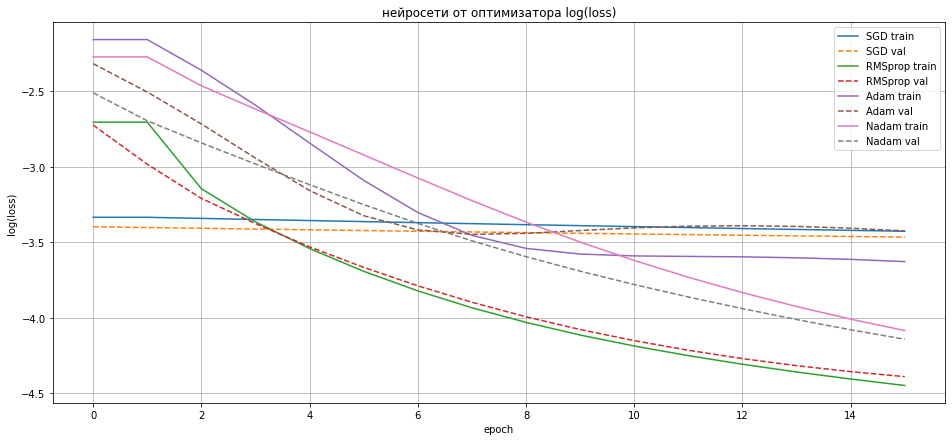

In [13]:
# Изменяем тип оптимизатора
###################################################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_4_list = []

# будем изменять оптимизаторы
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем модель boston_model_4
  boston_model_4 = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(64, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # сохраняем ее веса (это начальная точка) boston_model_4.save_weights('boston_model_4.h5')
  boston_model_4.save_weights('boston_model_4.h5')
  # создаем рабочую модель boston_model_l куда будем загружать эти весa (она должна быть идентичной структуры)  
  boston_model_l = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(64, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # загружаем веса boston_model_l.load_weights('boston_model_4.h5')
  boston_model_l.load_weights('boston_model_4.h5')
  # компилируем boston_model_l с одним из оптимизаторов
  boston_model_l.compile(optimizer=i_optim,
                       loss='mse',
                       metrics=['mae'])
  # вычисляем ошибку для boston_model_l без обучения
  bh0_l_tr = boston_model_l.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_l_val = boston_model_l.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh_4 = boston_model_l.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики mae
  bh_4_list.append(bh_4.history)
  # картинки
  plt.plot(epoch,np.log([bh0_l_tr[0]]+bh_4.history['loss']),'-',label = boston_model_l.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([bh0_l_val[0]]+bh_4.history['val_loss']),'--',label = boston_model_l.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

__Вывод:__

Лучше всего для данной задачи регрессии показал себя оптимизатор 'RMSprop'.

  __2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?__

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log


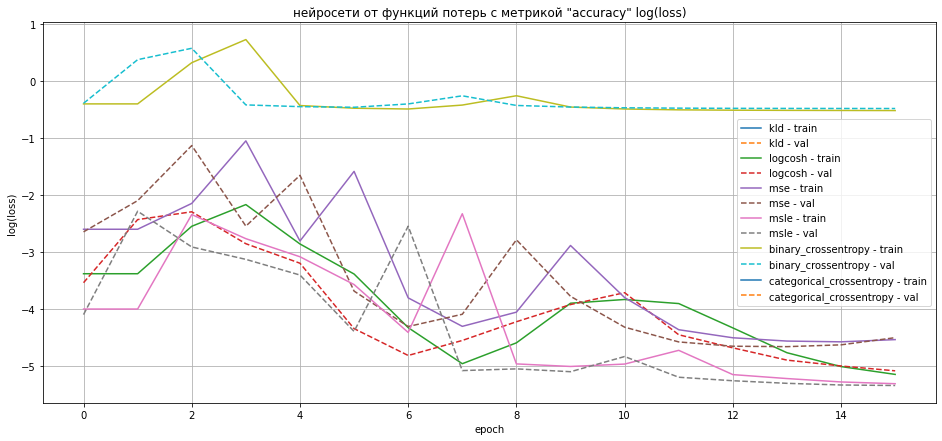

In [14]:
# Изменяем функцию потерь с метрикой 'accuracy'
###################################################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_5_list = []
loss_list = ['kld', 'logcosh', 'mse', 'msle', 'binary_crossentropy', 'categorical_crossentropy']
for los in loss_list:
  # создаем модель boston_model_5
  boston_model_5 = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # сохраняем ее веса (это начальная точка) boston_model_5.save_weights('boston_model_5.h5')
  boston_model_5.save_weights('boston_model_5.h5')
  # создаем рабочую модель boston_model_m куда будем загружать эти весa (она должна быть идентичной структуры)
  boston_model_m = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # загружаем веса boston_model_m.load_weights('boston_model_5.h5')
  boston_model_m.load_weights('boston_model_5.h5') 
  # компилируем boston_model_m     
  boston_model_m.compile(optimizer='rmsprop',
                       loss=los,
                       metrics=['accuracy'])
  # вычисляем ошибку для boston_model_m без обучения
  bh0_m_tr = boston_model_m.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_m_val = boston_model_m.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh_5 = boston_model_m.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )  
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики accuracy
  bh_5_list.append(bh_5.history)
  # картинки
  plt.plot(epoch,np.log([bh0_m_tr[0]]+bh_5.history['loss']),'-', label = los +' - train')
  plt.plot(epoch,np.log([bh0_m_val[0]]+bh_5.history['val_loss']),'--', label = los + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от функций потерь с метрикой "accuracy" log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show() 

In [15]:
# метрики 'accuracy' и 'val_accuracy' для последней нейронной сети цикла
bh_5.history['accuracy'][-1],bh_5.history['val_accuracy'][-1]

(0.006191950291395187, 0.0)

In [16]:
# проверка получившегося списка словарей с зафиксированной историей 
bh_5_list[5]['accuracy'][-1], bh_5_list[5]['val_accuracy'][-1]

(0.006191950291395187, 0.0)

In [17]:
# создание двумерного массива из зафиксированных в истории данных по 'accuracy' и 'val_accuracy' по каждой сети
ac_list_5 = []
for n in range(6):
  ac, v_ac = bh_5_list[n]['accuracy'][-1], bh_5_list[n]['val_accuracy'][-1]
  temp_list = [ac, v_ac]
  ac_list_5.append(temp_list)
ac_list_5

[[0.027863776311278343, 0.04938271641731262],
 [0.02476780116558075, 0.04938271641731262],
 [0.027863776311278343, 0.04938271641731262],
 [0.02476780116558075, 0.04938271641731262],
 [0.02476780116558075, 0.04938271641731262],
 [0.006191950291395187, 0.0]]

__Вывод:__

Лучше всего для данной задачи регрессии в качестве функции потерь с метрикой 'accuracy' показала себя функция 'logcosh'.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log


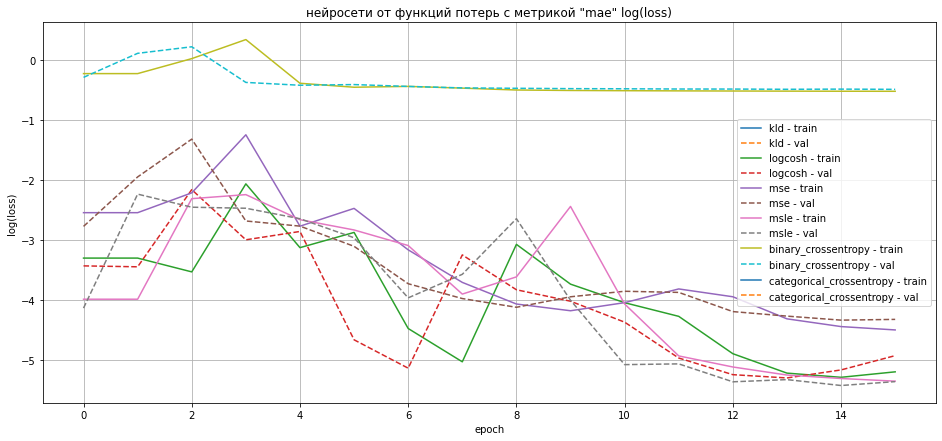

In [18]:
# Изменяем функцию потерь с метрикой 'mae'
###################################################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_6_list = []
loss_list = ['kld', 'logcosh', 'mse', 'msle', 'binary_crossentropy', 'categorical_crossentropy']
for los in loss_list:
  # создаем модель boston_model_6
  boston_model_6 = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # сохраняем ее веса (это начальная точка) boston_model_6.save_weights('boston_model_6.h5')
  boston_model_6.save_weights('boston_model_6.h5')
  # создаем рабочую модель boston_model_n куда будем загружать эти весa (она должна быть идентичной структуры)
  boston_model_n = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # загружаем веса boston_model_n.load_weights('boston_model_6.h5')
  boston_model_n.load_weights('boston_model_6.h5') 
  # компилируем boston_model_n    
  boston_model_n.compile(optimizer='rmsprop',
                       loss=los,
                       metrics=['mae'])
  # вычисляем ошибку для boston_model_n без обучения
  bh0_n_tr = boston_model_n.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_n_val = boston_model_n.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh_6 = boston_model_n.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )  
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики mae
  bh_6_list.append(bh_6.history)
  # картинки
  plt.plot(epoch,np.log([bh0_n_tr[0]]+bh_6.history['loss']),'-', label = los +' - train')
  plt.plot(epoch,np.log([bh0_n_val[0]]+bh_6.history['val_loss']),'--', label = los + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от функций потерь с метрикой "mae" log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show() 

In [19]:
# метрики 'mae' и 'val_mae' для последней нейронной сети цикла
bh_6.history['mae'][-1],bh_6.history['val_mae'][-1]

(0.37958720326423645, 0.41434842348098755)

In [20]:
# проверка получившегося списка словарей с зафиксированной историей 
bh_6_list[5]['mae'][-1], bh_6_list[5]['val_mae'][-1]

(0.37958720326423645, 0.41434842348098755)

In [21]:
# создание двумерного массива из зафиксированных в истории данных по 'mae' и 'val_mae' по каждой сети
mae_list_6 = []
for n in range(6):
  mae, v_mae = bh_6_list[n]['mae'][-1], bh_6_list[n]['val_mae'][-1]
  temp_list = [mae, v_mae]
  mae_list_6.append(temp_list)
mae_list_6

[[0.6203294396400452, 0.5855435729026794],
 [0.07721272855997086, 0.09918196499347687],
 [0.07211653888225555, 0.07996463030576706],
 [0.07290372252464294, 0.0701119601726532],
 [0.07490558922290802, 0.07456335425376892],
 [0.37958720326423645, 0.41434842348098755]]

__Вывод:__

Лучше всего для данной задачи регрессии в качестве функции потерь с метрикой 'mae' показала себя функция 'logcosh'.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log


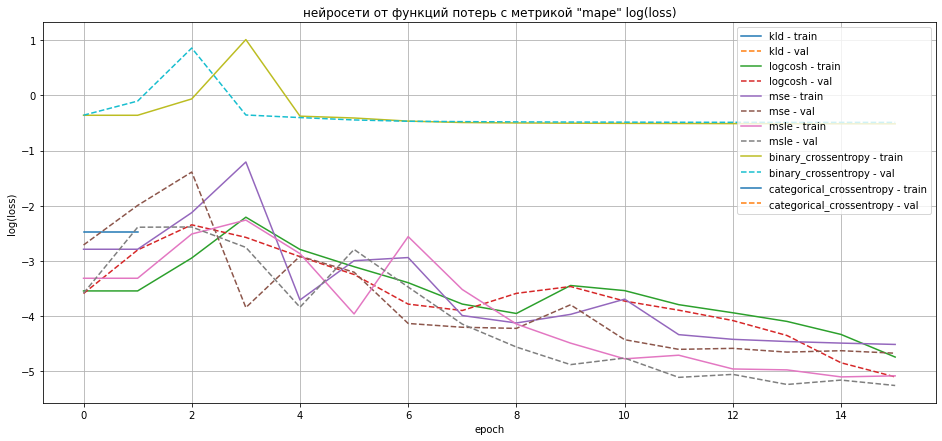

In [22]:
# Изменяем функцию потерь с метрикой 'mape'
###################################################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
bh_7_list = []
loss_list = ['kld', 'logcosh', 'mse', 'msle', 'binary_crossentropy', 'categorical_crossentropy']
for los in loss_list:
  # создаем модель boston_model_7
  boston_model_7 = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # сохраняем ее веса (это начальная точка) boston_model_7.save_weights('boston_model_7.h5')
  boston_model_7.save_weights('boston_model_7.h5')
  # создаем рабочую модель boston_model_o куда будем загружать эти весa (она должна быть идентичной структуры)
  boston_model_o = Sequential([
      Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(110, activation='linear'),
      Dense(1, activation='sigmoid')
  ])
  # загружаем веса boston_model_o.load_weights('boston_model_7.h5')
  boston_model_o.load_weights('boston_model_7.h5') 
  # компилируем boston_model_o    
  boston_model_o.compile(optimizer='rmsprop',
                       loss=los,
                       metrics=['mape'])
  # вычисляем ошибку для boston_model_o без обучения
  bh0_o_tr = boston_model_o.evaluate(train_x[:323,:], train_y[:323],verbose = 0)
  bh0_o_val = boston_model_o.evaluate(train_x[323:,:], train_y[323:],verbose = 0)
  # проводим обучение модели 
  bh_7 = boston_model_o.fit(
                  train_x,
                  train_y,
                  epochs=epochs,
                  batch_size=2000, validation_split=0.2, verbose = 0
                  )  
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики mape
  bh_7_list.append(bh_7.history)
  # картинки
  plt.plot(epoch,np.log([bh0_o_tr[0]]+bh_7.history['loss']),'-', label = los +' - train')
  plt.plot(epoch,np.log([bh0_o_val[0]]+bh_7.history['val_loss']),'--', label = los + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от функций потерь с метрикой "mape" log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show() 

In [23]:
# метрики 'mape' и 'val_mape' для последней нейронной сети цикла
bh_7.history['mape'][-1],bh_7.history['val_mape'][-1]

(99.38080596923828, 100.0)

In [24]:
# проверка получившегося списка словарей с зафиксированной историей 
bh_7_list[5]['mape'][-1], bh_7_list[5]['val_mape'][-1]

(99.38080596923828, 100.0)

In [25]:
# создание двумерного массива из зафиксированных в истории данных по 'mape' и 'val_mape' по каждой сети
mape_list_7 = []
for n in range(6):
  mape, v_mape = bh_7_list[n]['mape'][-1], bh_7_list[n]['val_mape'][-1]
  temp_list = [mape, v_mape]
  mape_list_7.append(temp_list)
mape_list_7

[[6192201.0, 217.56121826171875],
 [75398.65625, 24.999378204345703],
 [562661.6875, 19.51116180419922],
 [253631.734375, 22.38128662109375],
 [453795.21875, 18.380477905273438],
 [99.38080596923828, 100.0]]

__Вывод:__

Лучше всего для данной задачи регрессии в качестве функции потерь с метрикой 'mape' показала себя функция 'msle'.

In [26]:
# создание итоговой сравнительной таблицы 'accuracy' и 'val_accuracy' в зависимости от функции потерь
final_tab = pd.DataFrame(ac_list_5, index=['kld', 'logcosh', 'mse', 'msle', 'binary_crossentropy', 'categorical_crossentropy'], 
                         columns=['accuracy', 'val_accuracy'])
final_tab = final_tab.sort_values(by=['accuracy', 'val_accuracy'], ascending=False)
final_tab

,accuracy,val_accuracy
kld,0.027864,0.049383
mse,0.027864,0.049383
logcosh,0.024768,0.049383
msle,0.024768,0.049383
binary_crossentropy,0.024768,0.049383
categorical_crossentropy,0.006192,0.000000


In [27]:
# создание итоговой сравнительной таблицы 'mae' и 'val_mae' в зависимости от функции потерь
final_tab_2 = pd.DataFrame(mae_list_6, index=['kld', 'logcosh', 'mse', 'msle', 'binary_crossentropy', 'categorical_crossentropy'], 
                         columns=['mae', 'val_mae'])
final_tab_2 = final_tab_2.sort_values(by=['mae', 'val_mae'], ascending=False)
final_tab_2

,mae,val_mae
kld,0.620329,0.585544
categorical_crossentropy,0.379587,0.414348
logcosh,0.077213,0.099182
binary_crossentropy,0.074906,0.074563
msle,0.072904,0.070112
mse,0.072117,0.079965


In [28]:
# создание итоговой сравнительной таблицы 'mape' и 'val_mape' в зависимости от функции потерь
final_tab_3 = pd.DataFrame(mape_list_7, index=['kld', 'logcosh', 'mse', 'msle', 'binary_crossentropy', 'categorical_crossentropy'], 
                         columns=['mape', 'val_mape'])
final_tab_3 = final_tab_3.sort_values(by=['mape', 'val_mape'], ascending=False)
final_tab_3

,mape,val_mape
kld,6.192201e+06,217.561218
mse,5.626617e+05,19.511162
binary_crossentropy,4.537952e+05,18.380478
msle,2.536317e+05,22.381287
logcosh,7.539866e+04,24.999378
categorical_crossentropy,9.938081e+01,100.000000


In [29]:
# Общая итоговая таблица
final_tab = pd.concat([final_tab, final_tab_2, final_tab_3], axis=1)
final_tab = final_tab.sort_values(by=['accuracy', 'val_accuracy', 'mae', 'val_mae', 'mape', 'val_mape'], ascending=False)
final_tab

,accuracy,val_accuracy,mae,val_mae,mape,val_mape
kld,0.027864,0.049383,0.620329,0.585544,6.192201e+06,217.561218
mse,0.027864,0.049383,0.072117,0.079965,5.626617e+05,19.511162
logcosh,0.024768,0.049383,0.077213,0.099182,7.539866e+04,24.999378
binary_crossentropy,0.024768,0.049383,0.074906,0.074563,4.537952e+05,18.380478
msle,0.024768,0.049383,0.072904,0.070112,2.536317e+05,22.381287
categorical_crossentropy,0.006192,0.000000,0.379587,0.414348,9.938081e+01,100.000000
